### Importación de datos



In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [1]:


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [6]:
total_tienda1 = tienda['Precio'].sum()
total_tienda2 = tienda2['Precio'].sum()
total_tienda3 = tienda3['Precio'].sum()
total_tienda4 = tienda4['Precio'].sum()
# Crear un DataFrame para visualizar los totales
totales_por_tienda = pd.DataFrame({
    'Tienda': ['Tienda 1:', 'Tienda 2:', 'Tienda 3:', 'Tienda 4:'],
    'Total Ventas': [total_tienda1, total_tienda2, total_tienda3, total_tienda4]
})
print("\nResumen de Ventas Totales por Tienda:")
print(totales_por_tienda.to_string(index=False, float_format='{:,.2f}'.format))


Resumen de Ventas Totales por Tienda:
   Tienda     Total Ventas
Tienda 1: 1,150,880,400.00
Tienda 2: 1,116,343,500.00
Tienda 3: 1,098,019,600.00
Tienda 4: 1,038,375,700.00


# 2. Ventas por categoría

In [5]:
# Lista de los DataFrames de las tiendas y sus nombres
dataframes_tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

print("Análisis de ventas por categoría en cada tienda:")
print("=" * 60) # Separador principal

# Iterar sobre cada tienda
for nombre, df_tienda in zip(nombres_tiendas, dataframes_tiendas):
    print(f"\n--- {nombre} ---")

    # Verificar si el DataFrame no está vacío y tiene la columna necesaria
    if not df_tienda.empty and 'Categoría del Producto' in df_tienda.columns:
        # Agrupar por 'Categoría del Producto' y contar las filas (ventas) en cada grupo
        ventas_por_categoria = df_tienda.groupby('Categoría del Producto').size()

        # Verificar si el resultado del groupby no está vacío
        if not ventas_por_categoria.empty:
            # 1. Mostrar la lista completa ordenada de mayor a menor
            ventas_ordenadas = ventas_por_categoria.sort_values(ascending=False)
            print("Ventas por Categoría (ordenadas):")
            print(ventas_ordenadas)
            print("-" * 30) # Separador interno

            # 2. Encontrar y mostrar la categoría más vendida (usando los datos ya calculados)
            categoria_mas_vendida = ventas_por_categoria.idxmax()
            cantidad_ventas = ventas_por_categoria.max()
            print(f"Categoría más vendida: {categoria_mas_vendida} ({cantidad_ventas} ventas)")

        else:
            print("No se encontraron categorías con ventas en esta tienda.")

    else:
        print(f"No se encontraron datos o la columna 'Categoría del Producto' para {nombre}.")

    print("-" * 60) # Separador entre tiendas

Análisis de ventas por categoría en cada tienda:

--- Tienda 1 ---
Ventas por Categoría (ordenadas):
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
dtype: int64
------------------------------
Categoría más vendida: Muebles (465 ventas)
------------------------------------------------------------

--- Tienda 2 ---
Ventas por Categoría (ordenadas):
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
dtype: int64
------------------------------
Categoría más vendida: Muebles (442 ventas)
------------------------------------------------------------

--- Ti

# 3. Calificación promedio de la tienda


In [7]:
print("\nCalificación promedio por tienda:")
print("=" * 60) # Separador principal

# Crear un diccionario para almacenar las calificaciones promedio
calificaciones_promedio = {}

# Iterar sobre cada tienda
for nombre, df_tienda in zip(nombres_tiendas, dataframes_tiendas):
    print(f"\n--- {nombre} ---")

    # Verificar si el DataFrame no está vacío y tiene la columna 'Calificación'
    if not df_tienda.empty and 'Calificación' in df_tienda.columns:
        # Calcular la media de la columna 'Calificación'
        calificacion_media = df_tienda['Calificación'].mean()

        # Guardar en el diccionario (opcional, pero útil para resumen)
        calificaciones_promedio[nombre] = calificacion_media

        # Imprimir la calificación promedio para esta tienda, formateada a 2 decimales
        print(f"Calificación promedio: {calificacion_media:.2f}")

    else:
        print(f"No se encontraron datos o la columna 'Calificación' para {nombre}.")
        calificaciones_promedio[nombre] = None # Opcional: indicar que no hay dato

    print("-" * 60) # Separador entre tiendas


Calificación promedio por tienda:

--- Tienda 1 ---
Calificación promedio: 3.98
------------------------------------------------------------

--- Tienda 2 ---
Calificación promedio: 4.04
------------------------------------------------------------

--- Tienda 3 ---
Calificación promedio: 4.05
------------------------------------------------------------

--- Tienda 4 ---
Calificación promedio: 4.00
------------------------------------------------------------


# 4. Productos más y menos vendidos

In [8]:
print("\nProductos más y menos vendidos por tienda:")
print("=" * 60) # Separador principal

# Iterar sobre cada tienda
for nombre, df_tienda in zip(nombres_tiendas, dataframes_tiendas):
    print(f"\n--- {nombre} ---")

    # Verificar si el DataFrame no está vacío y tiene la columna 'Producto'
    if not df_tienda.empty and 'Producto' in df_tienda.columns:
        # Agrupar por 'Producto' y contar las veces que aparece cada uno (cantidad vendida)
        ventas_por_producto = df_tienda.groupby('Producto').size()

        # Verificar si el resultado del groupby no está vacío
        if not ventas_por_producto.empty:
            # Encontrar el producto con el máximo número de ventas
            producto_mas_vendido = ventas_por_producto.idxmax()
            cantidad_mas_vendido = ventas_por_producto.max()
            print(f"Producto más vendido: {producto_mas_vendido} ({cantidad_mas_vendido} unidades)")

            # Encontrar el producto con el mínimo número de ventas
            producto_menos_vendido = ventas_por_producto.idxmin()
            cantidad_menos_vendido = ventas_por_producto.min()
            print(f"Producto menos vendido: {producto_menos_vendido} ({cantidad_menos_vendido} unidades)")

        else:
            print("No se encontraron datos de ventas de productos en esta tienda.")

    else:
        print(f"No se encontraron datos o la columna 'Producto' para {nombre}.")

    print("-" * 60) # Separador entre tiendas


Productos más y menos vendidos por tienda:

--- Tienda 1 ---
Producto más vendido: Armario (60 unidades)
Producto menos vendido: Auriculares con micrófono (33 unidades)
------------------------------------------------------------

--- Tienda 2 ---
Producto más vendido: Iniciando en programación (65 unidades)
Producto menos vendido: Juego de mesa (32 unidades)
------------------------------------------------------------

--- Tienda 3 ---
Producto más vendido: Kit de bancas (57 unidades)
Producto menos vendido: Bloques de construcción (35 unidades)
------------------------------------------------------------

--- Tienda 4 ---
Producto más vendido: Cama box (62 unidades)
Producto menos vendido: Guitarra eléctrica (33 unidades)
------------------------------------------------------------


# 5. Envío promedio por tienda

In [9]:
print("\nCosto de envío promedio por tienda:")
print("=" * 60) # Separador principal

# Crear un diccionario para almacenar los costos de envío promedio (opcional)
envios_promedio = {}

# Iterar sobre cada tienda
for nombre, df_tienda in zip(nombres_tiendas, dataframes_tiendas):
    print(f"\n--- {nombre} ---")

    # Verificar si el DataFrame no está vacío y tiene la columna 'Costo de envío'
    if not df_tienda.empty and 'Costo de envío' in df_tienda.columns:
        # Calcular la media de la columna 'Costo de envío'
        costo_envio_medio = df_tienda['Costo de envío'].mean()

        # Guardar en el diccionario (opcional)
        envios_promedio[nombre] = costo_envio_medio

        # Imprimir el costo de envío promedio, formateado como moneda
        print(f"Costo de envío promedio: {costo_envio_medio:,.2f}") # Formato con separador de miles y 2 decimales

    else:
        print(f"No se encontraron datos o la columna 'Costo de envío' para {nombre}.")
        envios_promedio[nombre] = None # Opcional: indicar que no hay dato

    print("-" * 60) # Separador entre tiendas


Costo de envío promedio por tienda:

--- Tienda 1 ---
Costo de envío promedio: 26,018.61
------------------------------------------------------------

--- Tienda 2 ---
Costo de envío promedio: 25,216.24
------------------------------------------------------------

--- Tienda 3 ---
Costo de envío promedio: 24,805.68
------------------------------------------------------------

--- Tienda 4 ---
Costo de envío promedio: 23,459.46
------------------------------------------------------------


## 6. graficos

In [14]:
# --- Configuración de estilo  ---
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (20, 6) # Tamaño predeterminado para las figuras


--- Gráfico 1: Ventas Totales por Tienda ---


E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


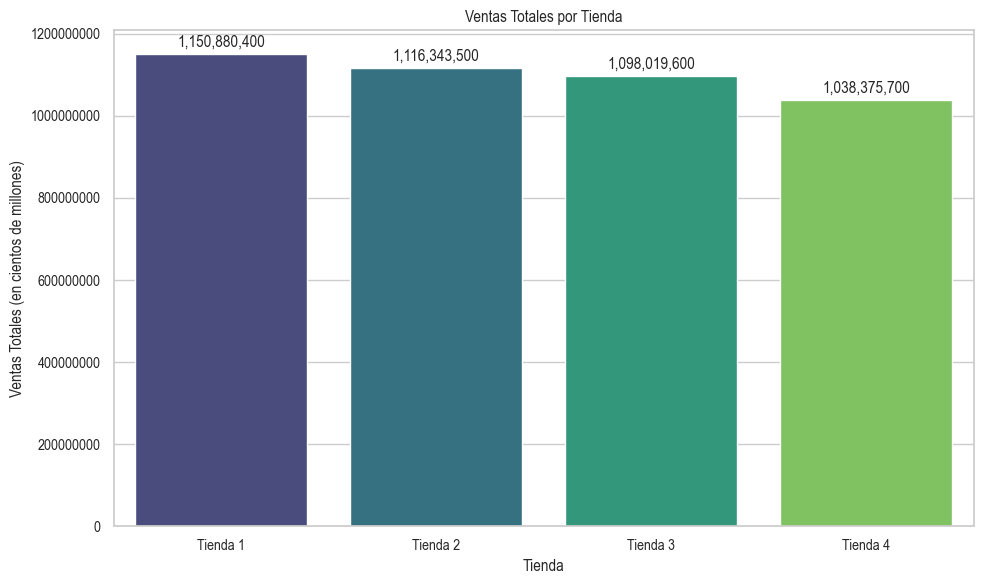


--- Gráfico 2: Calificación Promedio por Tienda ---


E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


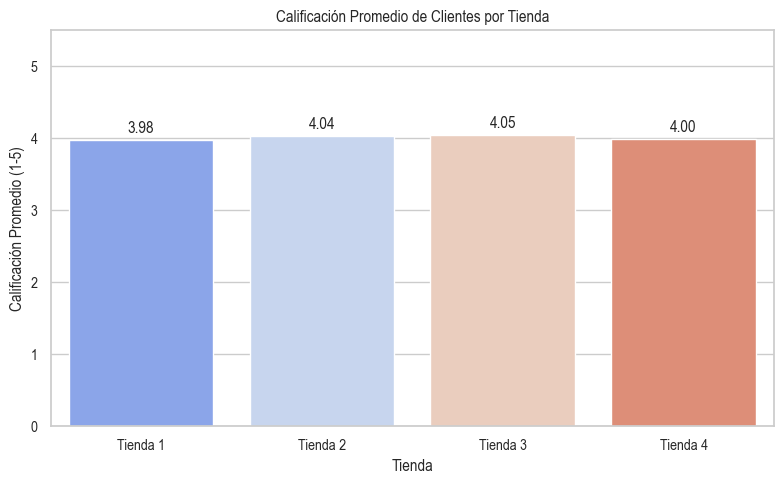


--- Gráfico 3: Relación Precio vs. Costo de Envío ---


E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\Lib\site-pa

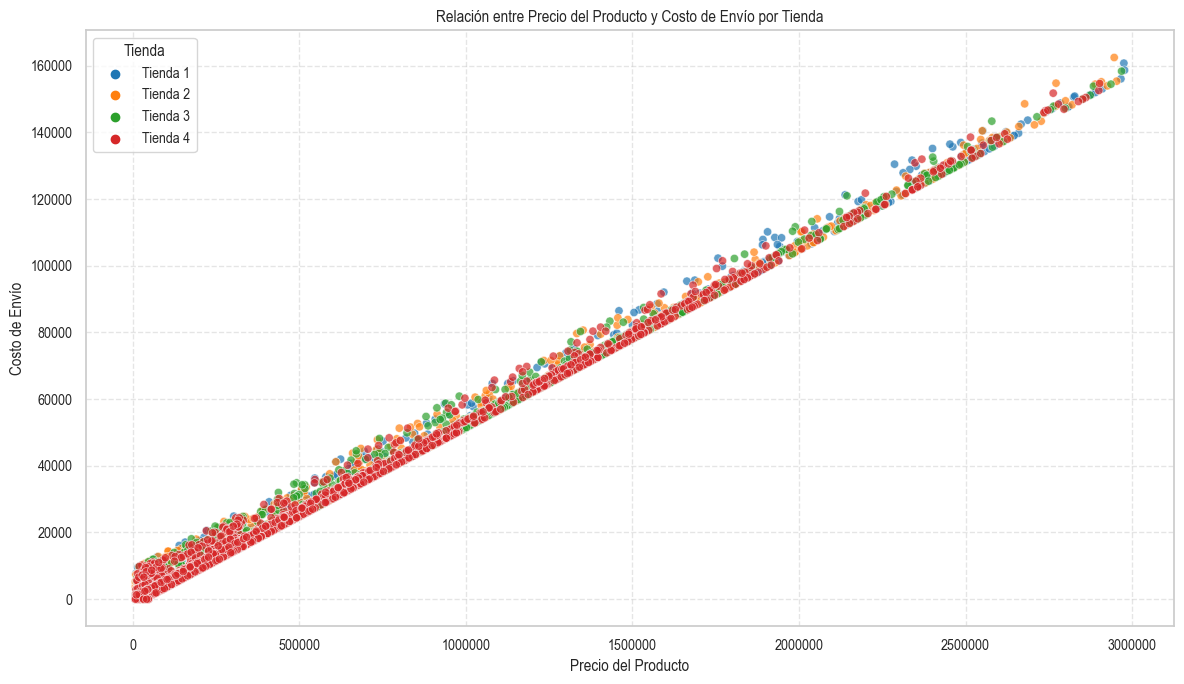


--- Gráfico 4 : Distribución de Categorías - Tienda 1 ---


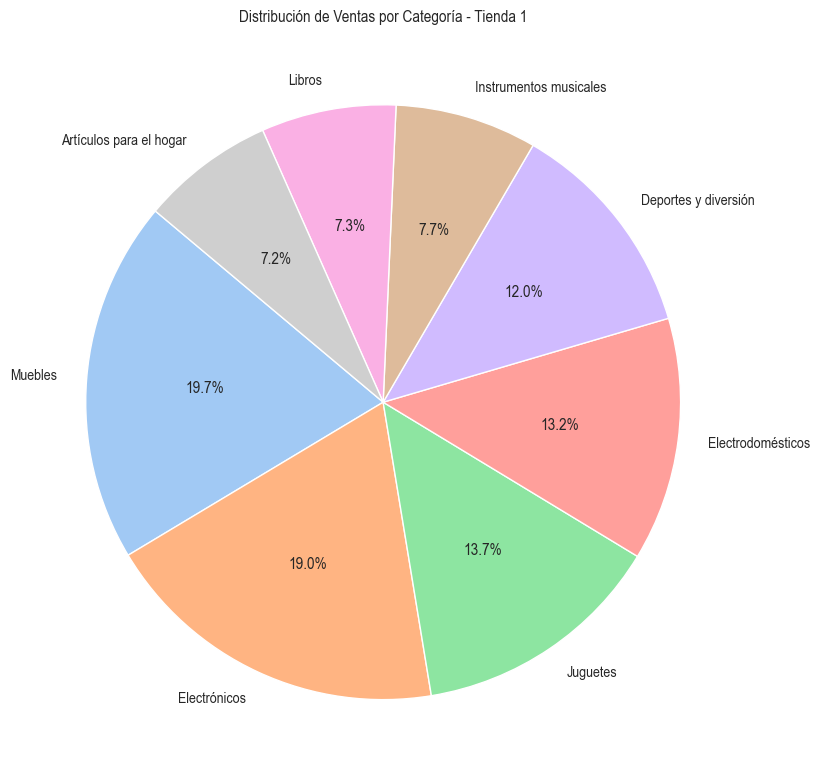

In [19]:
# --- Preparación de datos para gráficos (si es necesario) ---

# 1. Datos para Ventas Totales 
totales_por_tienda['Tienda'] = totales_por_tienda['Tienda'].str.replace(':', '', regex=False)


# 2. Datos para Calificaciones Promedio 
# Convertir a Series para facilitar el gráfico
calificaciones_promedio_series = pd.Series(calificaciones_promedio).dropna() # dropna por si alguna tienda no tenía datos

# 3. Datos combinados para Scatter Plot (Precio vs Costo Envío)
# Necesitamos un único DataFrame con todos los datos y una columna indicando la tienda

dfs_con_nombre = []
for nombre, df in zip(nombres_tiendas, dataframes_tiendas):
    df_copy = df.copy() # Trabajar con una copia para no modificar los originales
    df_copy['Nombre Tienda'] = nombre
    dfs_con_nombre.append(df_copy)

df_combinado = pd.concat(dfs_con_nombre, ignore_index=True)

# --- Gráfico 1: Comparación de Ventas Totales por Tienda (Gráfico de Barras) ---
print("\n--- Gráfico 1: Ventas Totales por Tienda ---")
plt.figure(figsize=(10, 6))
barplot_ventas = sns.barplot(x='Tienda', y='Total Ventas', data=totales_por_tienda, palette='viridis')
plt.title('Ventas Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ventas Totales (en cientos de millones)')

plt.ticklabel_format(style='plain', axis='y')
# Añadir etiquetas de valor sobre las barras
for container in barplot_ventas.containers:
    barplot_ventas.bar_label(container, fmt='{:,.0f}', label_type='edge', padding=3)
plt.tight_layout()
plt.show()


# --- Gráfico 2: Comparación de Calificación Promedio por Tienda (Gráfico de Barras) ---
print("\n--- Gráfico 2: Calificación Promedio por Tienda ---")
plt.figure(figsize=(8, 5))
barplot_calif = sns.barplot(x=calificaciones_promedio_series.index, y=calificaciones_promedio_series.values, palette='coolwarm')
plt.title('Calificación Promedio de Clientes por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio (1-5)')
plt.ylim(0, 5.5) 
# Añadir etiquetas de valor sobre las barras
for container in barplot_calif.containers:
    barplot_calif.bar_label(container, fmt='{:.2f}', label_type='edge', padding=3)
plt.tight_layout()
plt.show()


# --- Gráfico 3: Relación entre Precio y Costo de Envío (Gráfico de Dispersión) ---
print("\n--- Gráfico 3: Relación Precio vs. Costo de Envío ---")
plt.figure(figsize=(12, 7))
scatterplot = sns.scatterplot(data=df_combinado, x='Precio', y='Costo de envío', hue='Nombre Tienda', alpha=0.7, palette='tab10')
plt.title('Relación entre Precio del Producto y Costo de Envío por Tienda')
plt.xlabel('Precio del Producto')
plt.ylabel('Costo de Envío')
plt.ticklabel_format(style='plain', axis='both') # Evitar notación científica
plt.legend(title='Tienda')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ---  Gráfico 4: Distribución de Categorías en una Tienda Específica (Gráfico de Pastel) ---
# Elegimos una tienda, por ejemplo, Tienda 1
print("\n--- Gráfico 4 : Distribución de Categorías - Tienda 1 ---")
nombre_tienda_pie = 'Tienda 1'
df_tienda_pie = tienda # Usamos el DataFrame original de la tienda 1

if not df_tienda_pie.empty and 'Categoría del Producto' in df_tienda_pie.columns:
    ventas_categoria_pie = df_tienda_pie.groupby('Categoría del Producto').size().sort_values(ascending=False)

    if not ventas_categoria_pie.empty:
        plt.figure(figsize=(10, 8))
        plt.pie(ventas_categoria_pie, labels=ventas_categoria_pie.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
        plt.title(f'Distribución de Ventas por Categoría - {nombre_tienda_pie}')
        plt.ylabel('') # Ocultar etiqueta 'ylabel' que pone por defecto en pie
        plt.tight_layout()
        plt.show()
    else:
        print(f"No hay datos de categorías para {nombre_tienda_pie}.")
else:
    print(f"No se pueden generar datos de categorías para {nombre_tienda_pie}.")

## 7. Analisis de resultados

# 📊 Informe de Análisis de Tiendas para Sr. Juan

## 🎯 Introducción

El presente informe tiene como objetivo analizar el desempeño de cuatro tiendas (Tienda 1, Tienda 2, Tienda 3 y Tienda 4) con base en datos de ventas, productos, calificaciones y costos de envío. El propósito final es proporcionar una recomendación fundamentada al Sr. Juan sobre cuál de estas tiendas representa la mejor oportunidad para enfocar sus esfuerzos de venta, considerando diversos factores clave extraídos del análisis de datos. Los datos provienen de los archivos CSV proporcionados por Alura Latam.

## 📈 Desarrollo del Análisis

A continuación, se presenta un resumen de los hallazgos clave para cada factor analizado en las cuatro tiendas:

### 💰 1. Ingresos Totales por Tienda

Se calcularon las ventas totales (suma de la columna 'Precio') para cada tienda:

*  **Tienda 1:**  $1,150,880,400.00
*  **Tienda 2:**  $1,116,343,500.00
*  **Tienda 3:**  $1,098,019,600.00
*  **Tienda 4:**  $1,038,375,700.00

**Observación:** La **Tienda 1** presenta los ingresos totales más altos, seguida de cerca por la Tienda 2. La Tienda 4 tiene los ingresos más bajos. El gráfico de barras de "Ventas Totales por Tienda" confirma visualmente esta jerarquía.

### 🏷️ 2. Ventas por Categoría

Se analizó la cantidad de ventas por categoría en cada tienda:

*   **Categoría Más Vendida (Consistentemente):** **Muebles** es la categoría con mayor número de ventas en *todas* las tiendas.
    *   Tienda 1: Muebles (465 ventas)
    *   Tienda 2: Muebles (442 ventas)
    *   Tienda 3: Muebles (499 ventas) - *La mayor cantidad*
    *   Tienda 4: Muebles (480 ventas)
*   **Categorías Menos Vendidas (Variable):** Las categorías con menos ventas varían, pero frecuentemente incluyen "Artículos para el hogar" e "Instrumentos musicales".
    *   Tienda 1: Artículos para el hogar (171 ventas)
    *   Tienda 2: Artículos para el hogar (181 ventas)
    *   Tienda 3: Instrumentos musicales / Artículos para el hogar (177 ventas cada una)
    *   Tienda 4: Instrumentos musicales (170 ventas)

**Observación:** Existe una fuerte demanda de "Muebles" en todas las plataformas. La **Tienda 3** destaca por tener el mayor volumen de ventas en esta categoría principal. El gráfico de pastel para Tienda 1 muestra visualmente la distribución, confirmando "Muebles" como la categoría líder.

### ⭐ 3. Calificación Promedio de Clientes

Se calculó la calificación promedio otorgada por los clientes (escala 1-5):

*   **Tienda 1:** 3.98
*   **Tienda 2:** 4.04
*   **Tienda 3:** 4.05 - *La más alta*
*   **Tienda 4:** 4.00

**Observación:** Todas las tiendas tienen calificaciones promedio buenas, cercanas a 4.0. Sin embargo, la **Tienda 3** tiene la calificación promedio ligeramente más alta, sugiriendo una mayor satisfacción general del cliente, seguida de cerca por la Tienda 2. La Tienda 1 tiene la calificación más baja, aunque aún respetable. El gráfico de barras de "Calificación Promedio" ilustra estas diferencias.

### 📦 4. Productos Más y Menos Vendidos (por Unidad)

Se identificaron los productos específicos con mayor y menor cantidad de unidades vendidas:

*   **Tienda 1:**
    *   ➕ Más Vendido: Armario (60 unidades)
    *   ➖ Menos Vendido: Auriculares con micrófono (33 unidades)
*   **Tienda 2:**
    *   ➕ Más Vendido: Iniciando en programación (65 unidades) - *Mayor cantidad individual*
    *   ➖ Menos Vendido: Juego de mesa (32 unidades)
*   **Tienda 3:**
    *   ➕ Más Vendido: Kit de bancas (57 unidades)
    *   ➖ Menos Vendido: Bloques de construcción (35 unidades)
*   **Tienda 4:**
    *   ➕ Más Vendido: Cama box (62 unidades)
    *   ➖ Menos Vendido: Guitarra eléctrica (33 unidades)

**Observación:** No hay un único producto "estrella" que domine en todas las tiendas. Los productos más y menos vendidos varían considerablemente, indicando posibles nichos o especializaciones diferentes en cada tienda.

### 🚚 5. Costo de Envío Promedio

Se calculó el costo promedio de envío por transacción:

*    **Tienda 1:** $26,018.61 
*    **Tienda 2:** $25,216.24
*    **Tienda 3:** $24,805.68
*    **Tienda 4:** $23,459.46 

**Observación:** La **Tienda 4** ofrece el costo de envío promedio más bajo, lo cual podría ser un factor atractivo para los clientes. La Tienda 1 tiene el costo más elevado. El gráfico de dispersión "Relación Precio vs. Costo de Envío" muestra una tendencia general donde productos más caros tienden a tener envíos más costosos, pero con variaciones entre tiendas.

## ✅ Conclusión y Recomendación

Tras evaluar los diferentes factores analizados y las visualizaciones generadas, se recomienda que el Sr. Juan enfoque sus esfuerzos de venta principalmente en la **Tienda 3**.

**Justificación:**

1.  **Satisfacción del Cliente (⭐):** La Tienda 3 posee la calificación promedio más alta (4.05), indicando un mayor nivel de satisfacción y potencialmente una base de clientes más leal o propensa a recomendar.
2.  **Fuerza en Categoría Principal (:** Aunque "Muebles" es la categoría más vendida en todas las tiendas, la Tienda 3 registra el mayor número absoluto de ventas (499) en esta categoría dominante. Si los productos del Sr. Juan se alinean con esta u otras categorías populares allí, el potencial de ventas es alto.
3.  **Ingresos Sólidos (💰):** Si bien no es la tienda con mayores ingresos totales (posición 3), sus ventas son muy competitivas y cercanas a las de Tienda 2 y 1.
4.  **Costos de Envío Competitivos (:** Su costo de envío promedio ($24,805.68) es el segundo más bajo, lo que la hace atractiva para los compradores en comparación con Tienda 1 y 2, sin sacrificar significativamente el volumen de ventas como podría suceder en Tienda 4 (que tiene los ingresos más bajos).

**Consideraciones Adicionales:**

*   **Tienda 1:** A pesar de tener los mayores ingresos, su calificación promedio es la más baja y sus costos de envío son los más altos, lo que podría indicar posibles fricciones con los clientes o menor rentabilidad neta.
*   **Tienda 2:** Es una opción sólida y muy cercana a Tienda 3 en varios aspectos, pero Tienda 3 la supera ligeramente en calificación y ventas de la categoría principal.
*   **Tienda 4:** Atractiva por sus bajos costos de envío, pero sus ingresos totales significativamente menores sugieren un volumen de mercado potencialmente más pequeño.

En resumen, la **Tienda 3** ofrece la combinación más equilibrada de volumen de ventas competitivo (especialmente en categorías clave), alta satisfacción del cliente y costos de envío razonables, posicionándola como la opción estratégica recomendada para el Sr. Juan.

## 8. Extra


--- Gráfico 5: Distribución Geográfica de Ventas por Tienda ---


E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\Lib\site-pa

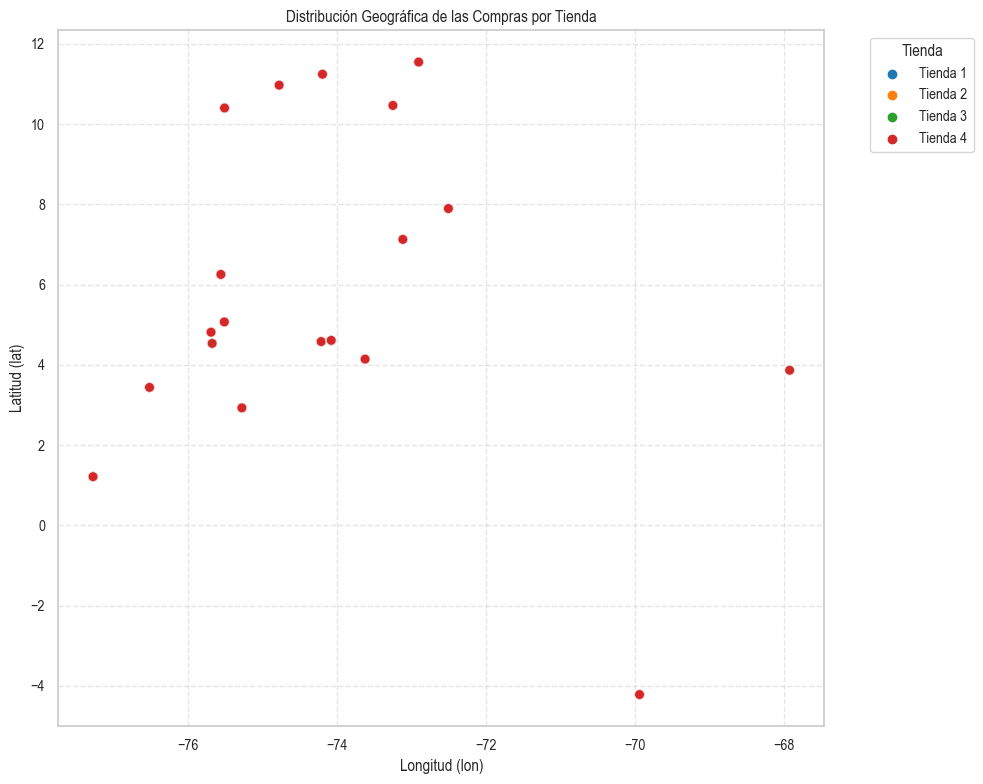


--- Gráfico 6: Distribución Geográfica - Tamaño por Precio ---


E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\Lib\site-pa

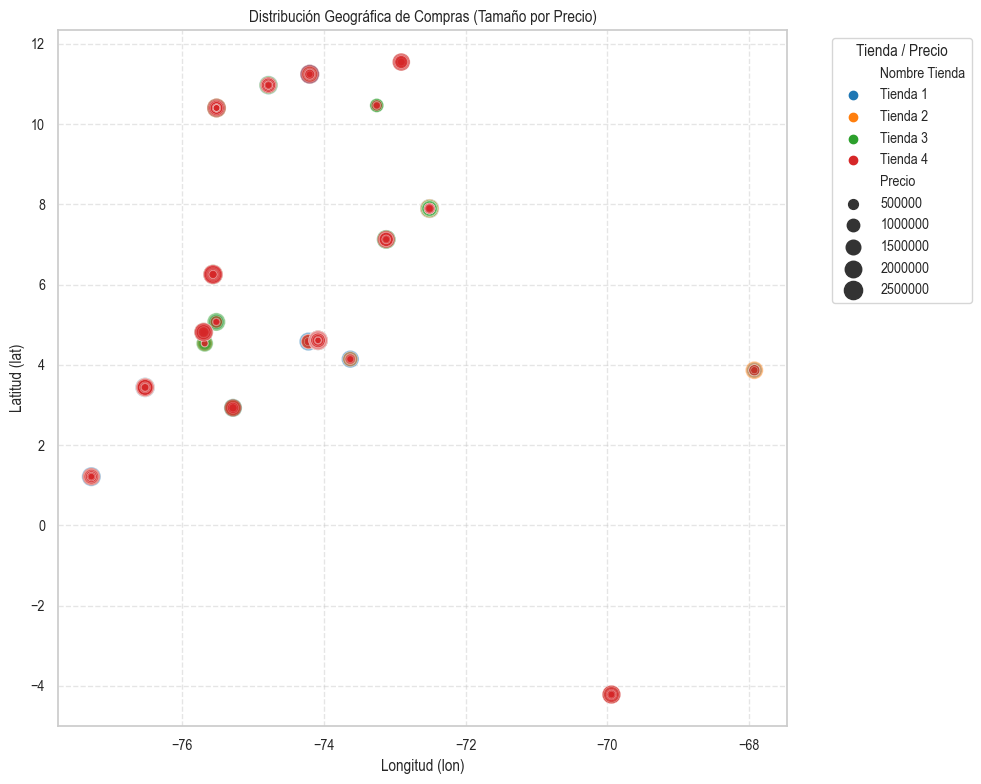


--- Gráfico 7: Distribución Geográfica - Color por Calificación ---


E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


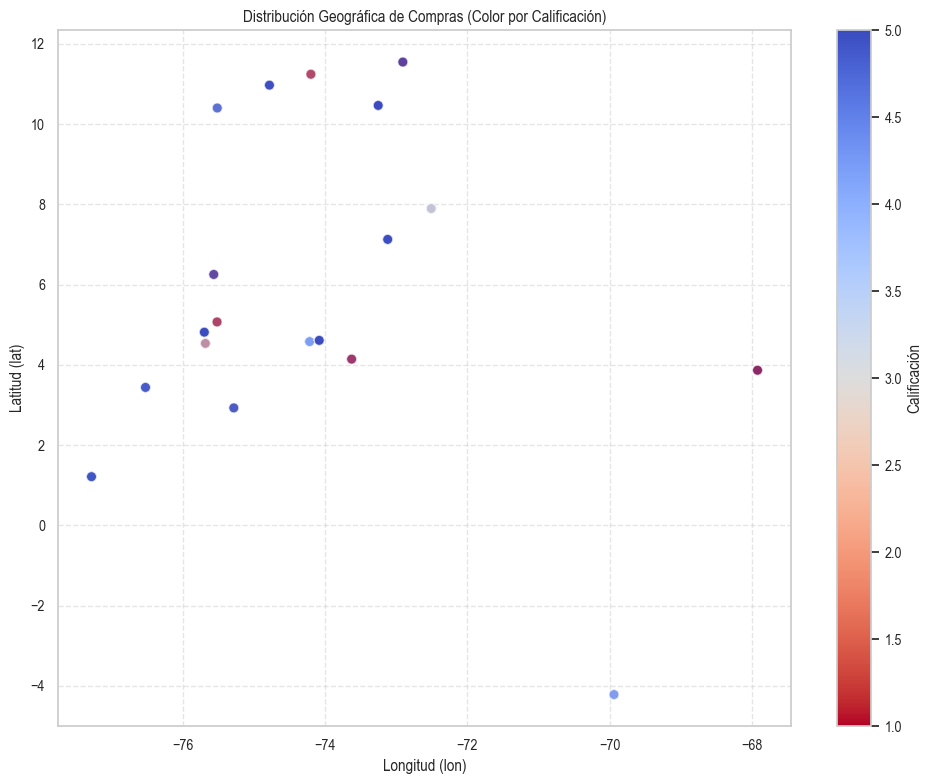

In [18]:
# Verificar si df_combinado existe, si no, crearlo de nuevo (código de la sección 6)
try:
    df_combinado.head(1) # Intenta acceder a df_combinado
except NameError:
    print("Creando df_combinado de nuevo...")
    dfs_con_nombre = []
    for nombre, df in zip(nombres_tiendas, dataframes_tiendas):
        df_copy = df.copy()
        df_copy['Nombre Tienda'] = nombre
        dfs_con_nombre.append(df_copy)
    df_combinado = pd.concat(dfs_con_nombre, ignore_index=True)
    print("df_combinado creado.")

# --- Gráfico 5: Distribución Geográfica de Ventas por Tienda (Scatter Plot) ---
print("\n--- Gráfico 5: Distribución Geográfica de Ventas por Tienda ---")
plt.figure(figsize=(10, 8)) # Ajustar tamaño para mejor visualización de coordenadas
scatter_geo_tienda = sns.scatterplot(
    data=df_combinado,
    x='lon',
    y='lat',
    hue='Nombre Tienda',
    palette='tab10', # Paleta de colores distintiva
    alpha=0.6,       # Transparencia para ver superposiciones
    s=50             # Tamaño de los puntos
)
plt.title('Distribución Geográfica de las Compras por Tienda')
plt.xlabel('Longitud (lon)')
plt.ylabel('Latitud (lat)')
plt.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left') # Mover leyenda fuera del gráfico
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout() # Ajustar layout para que no se corte la leyenda
plt.show()

# --- Gráfico 6: Distribución Geográfica con Tamaño por Precio (Scatter Plot) ---
# Puede ser útil para ver si ventas de mayor valor se concentran geográficamente
print("\n--- Gráfico 6: Distribución Geográfica - Tamaño por Precio ---")
plt.figure(figsize=(10, 8))
scatter_geo_precio = sns.scatterplot(
    data=df_combinado,
    x='lon',
    y='lat',
    hue='Nombre Tienda', # Mantenemos el color por tienda para comparación
    size='Precio',       # Tamaño del punto basado en el precio
    sizes=(20, 200),     # Rango de tamaños para los puntos
    palette='tab10',
    alpha=0.5
)
plt.title('Distribución Geográfica de Compras (Tamaño por Precio)')
plt.xlabel('Longitud (lon)')
plt.ylabel('Latitud (lat)')
plt.legend(title='Tienda / Precio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.ticklabel_format(style='plain', axis='both') # Evitar notación científica si aplica
plt.tight_layout()
plt.show()

# --- Gráfico 7: Distribución Geográfica Coloreada por Calificación (Scatter Plot) ---
# Usaremos una paleta divergente para calificaciones (ej. bajo vs alto)
print("\n--- Gráfico 7: Distribución Geográfica - Color por Calificación ---")
plt.figure(figsize=(10, 8))
scatter_geo_calif = sns.scatterplot(
    data=df_combinado,
    x='lon',
    y='lat',
    hue='Calificación',  # Colorear por la calificación
    palette='coolwarm_r', # Paleta divergente (rojo=bajo, azul=alto) o 'viridis' para secuencial
    alpha=0.6,
    s=50,
    legend='full'        # Mostrar leyenda completa para la escala de colores
)
plt.title('Distribución Geográfica de Compras (Color por Calificación)')
plt.xlabel('Longitud (lon)')
plt.ylabel('Latitud (lat)')
# Ajustar la leyenda para la escala de colores
norm = plt.Normalize(df_combinado['Calificación'].min(), df_combinado['Calificación'].max())
sm = plt.cm.ScalarMappable(cmap="coolwarm_r", norm=norm)
sm.set_array([])
# Eliminar la leyenda anterior de Seaborn si se crea automáticamente
if scatter_geo_calif.legend_:
    scatter_geo_calif.legend_.remove()
# Añadir barra de color como leyenda
cbar = plt.colorbar(sm, ax=scatter_geo_calif.axes)
cbar.set_label('Calificación')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()